In [1]:
import pandas as pd
dataset = pd.read_csv('../../Dataset/HousingDataset/Melbourne_housing_dataset_full.csv')
dataset.head()

# the extract column is added only for task 1.1.2.c to get only imputed tuples in a separate CSV
dataset['extract'] = 0
dataset.loc[dataset.isnull().any(axis=1),'extract'] = 1

# Data Preprocessing

In this part, I will be doing data preprocessing on almost all the columns and trying to drop minimum number of rows. I will be using mark_up language to help the evaluator navigate through my code.

However, in the next section of model Building, I will predict the prices of the house. In order to do that, I will need to drop the rows that contain NaN in price. My purpose for selecting Price as the target variable will be explained in the later section

In [2]:
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
extract              0
dtype: int64

# Task 1.1.1 Drop all Columns with missing Values

In [3]:
columns_containing_na = [col for col in dataset.columns if dataset[col].isnull().sum()]
print(columns_containing_na)

['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [4]:
drop_column = dataset[columns_containing_na]
drop_column.head()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
drop_column.to_csv('drop.csv',index=False)

In [6]:
del drop_column

# Task 1.1.2.a Impute Values Using Mean/Median/Mode

In [7]:
# fawkner lot has only one entry with many null values so we can remove it
dataset = dataset.drop(dataset[dataset.Suburb == 'fawkner lot'].index)

# There is only one property from year 1196 and we can drop that row
dataset = dataset.drop(dataset[dataset.YearBuilt == 1196.0].index)

suburbs_missing_data = ['macleod' 'cranbourne east' 'olinda']
print(suburbs_missing_data)
for suburb_region in suburbs_missing_data:
    dataset = dataset.drop(dataset[dataset.Suburb == suburb_region].index)

['macleodcranbourne eastolinda']


In [8]:
import matplotlib.pyplot as plt

In [9]:
# Converting all string based columns to lowercase
dataset.Suburb = dataset.Suburb.str.lower()
dataset.Address = dataset.Address.str.lower()
dataset.Type = dataset.Type.str.lower()
dataset.Method = dataset.Method.str.lower()
dataset.SellerG = dataset.SellerG.str.lower()
dataset.Regionname = dataset.Regionname.str.lower()
dataset.CouncilArea = dataset.CouncilArea.str.lower()

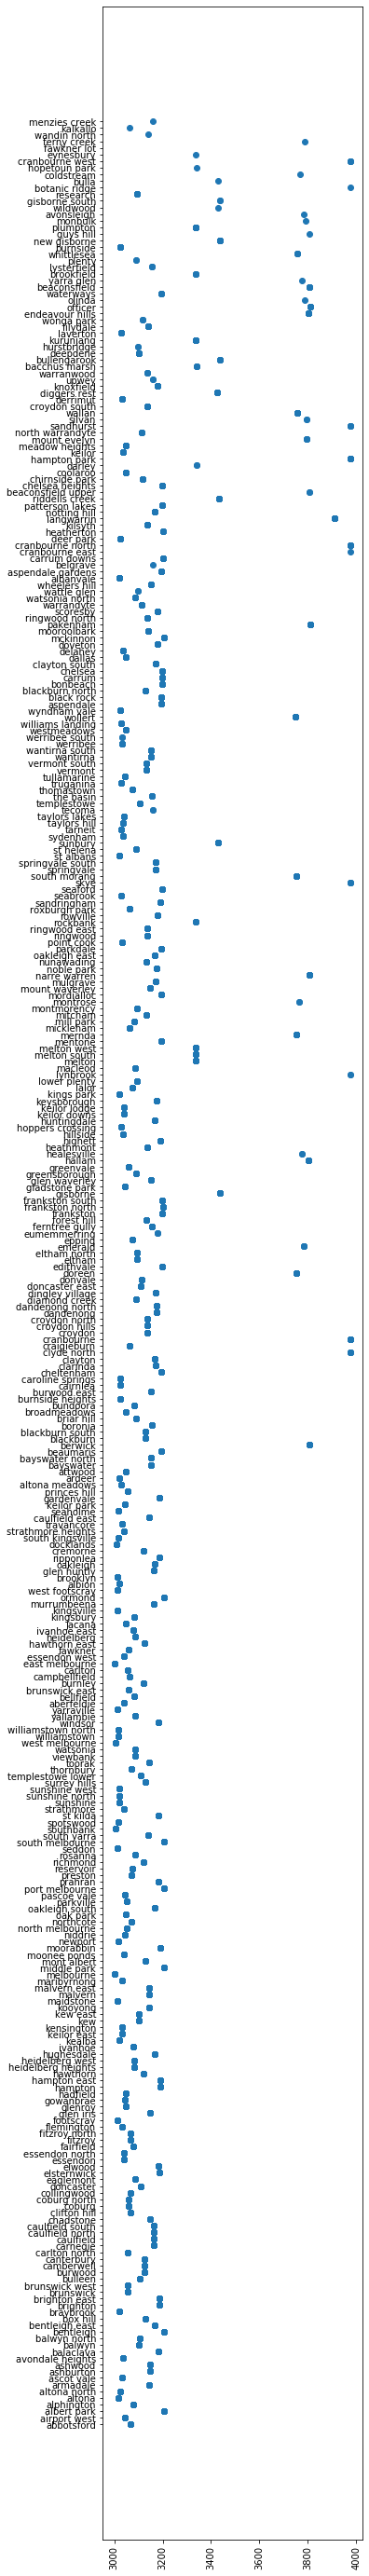

In [10]:
# Graph to give insight about postcode
plt.rcParams['figure.figsize'] = [5, 50]
plt.scatter(dataset.Postcode , dataset.Suburb)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
dataset.Postcode = dataset.groupby('Suburb').Postcode.transform(lambda x:x.fillna(x.median()))

/home/parth/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [12]:
dataset.loc[(dataset.Suburb == 'footscray') & (dataset.CouncilArea.isnull()),'CouncilArea'] = 'maribyrnong city council'
dataset.loc[(dataset.Suburb == 'camberwell') & (dataset.CouncilArea.isnull()),'CouncilArea'] = 'boroondara city council'

dataset.loc[(dataset.Suburb == 'footscray') & (dataset.Regionname.isnull()),'Regionname'] = 'western metropolitan'
dataset.loc[(dataset.Suburb == 'camberwell') & (dataset.Regionname.isnull()),'Regionname'] = 'southern metropolitan'

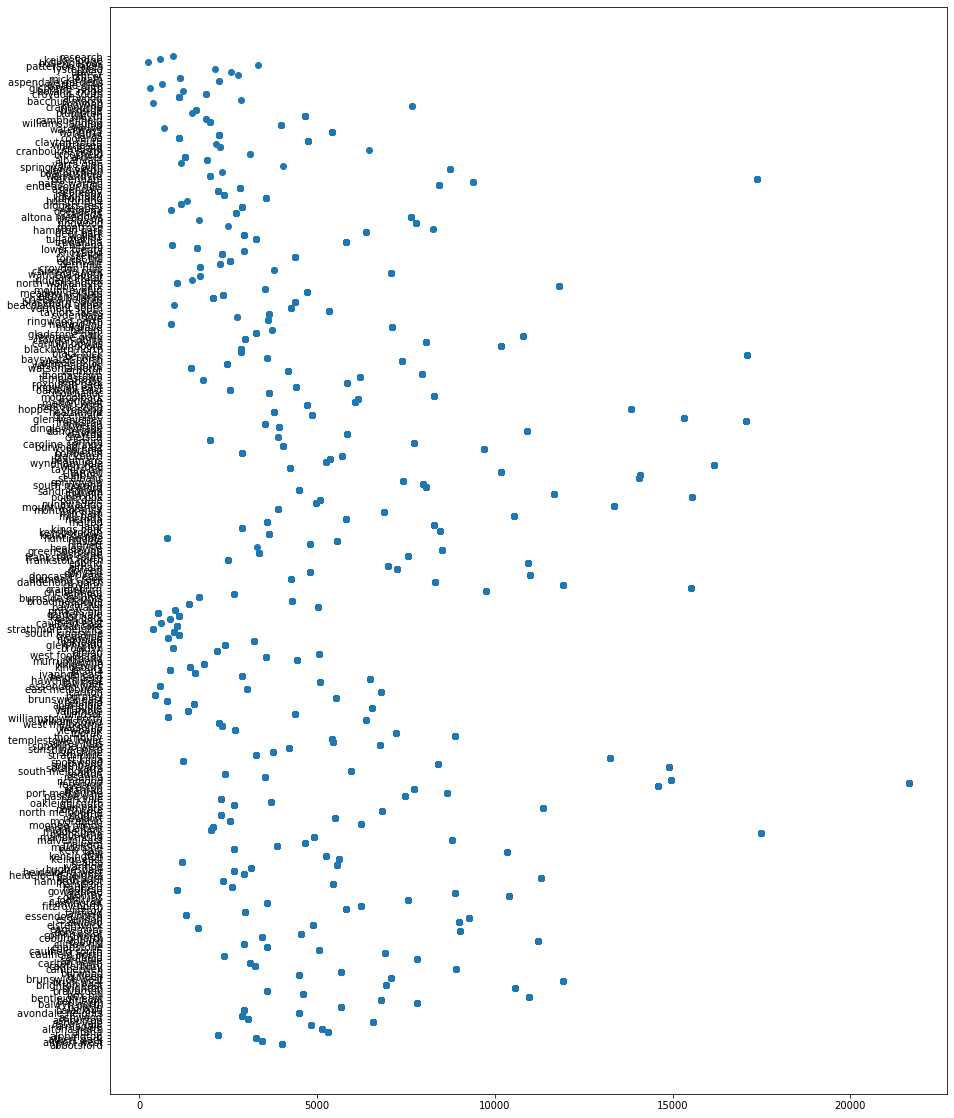

In [13]:
plt.rcParams['figure.figsize'] = [15, 20]
plt.scatter(dataset.dropna().Propertycount,dataset.dropna().Suburb)
plt.show()

In [14]:
# property count for suburbs is the same and hence 
dataset.Propertycount = dataset.groupby('Suburb').Propertycount.transform(lambda x:x.fillna(x.median()))

# latitude and longitutde of a any suburb are in very close range and since we can not have outliers 
# here we can simply use mean to fill the missing values
dataset.Lattitude = dataset.groupby('Suburb').Lattitude.transform(lambda x:x.fillna(x.mean()))
dataset.Longtitude = dataset.groupby('Suburb').Longtitude.transform(lambda x:x.fillna(x.mean()))

/home/parth/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


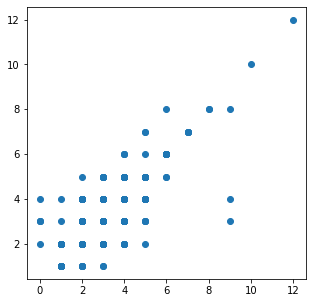

In [15]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(dataset.dropna().Bedroom2,dataset.dropna().Rooms)
plt.show()

In [16]:
# median of the number of bedrooms grouped by rooms could be a good fit for the missing values of Bedrooms
dataset.Bedroom2 = dataset.groupby('Rooms').Bedroom2.transform(lambda x:x.fillna(x.median()))
dataset.Bathroom = dataset.groupby('Rooms').Bathroom.transform(lambda x:x.fillna(x.median()))
dataset.Car = dataset.groupby('Rooms').Car.transform(lambda x:x.fillna(x.median()))

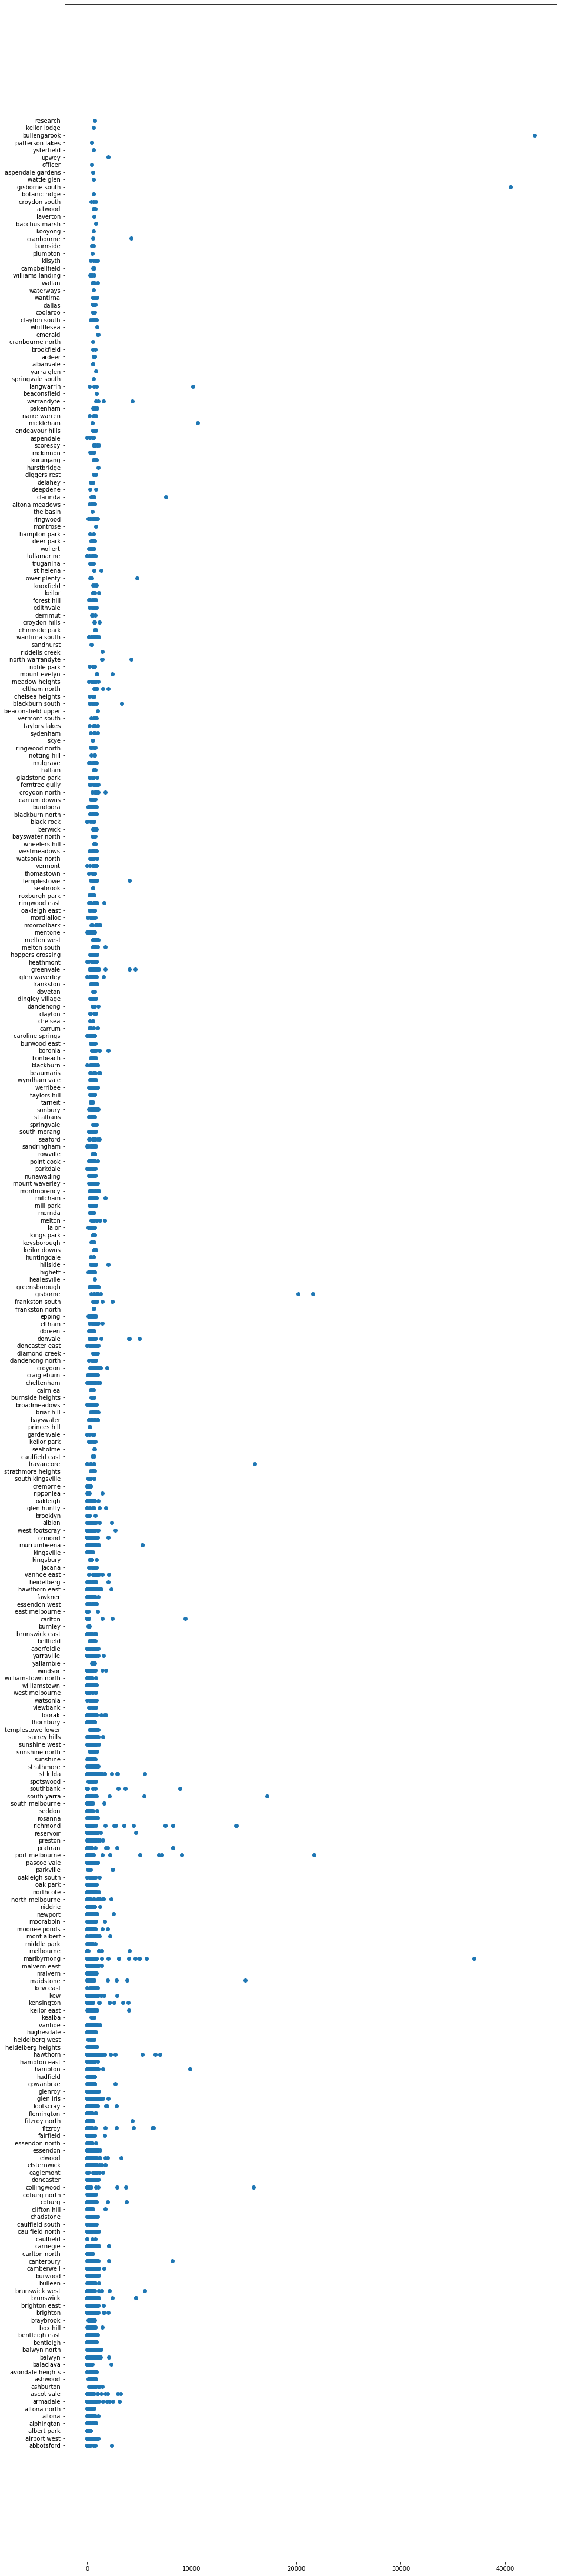

In [17]:
plt.rcParams['figure.figsize'] = [15, 80]
plt.scatter(dataset.dropna().Landsize,dataset.dropna().Suburb)
plt.show()

In [18]:
dataset.Landsize = dataset.groupby('Suburb').Landsize.transform(lambda x:x.fillna(x.median()))

/home/parth/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


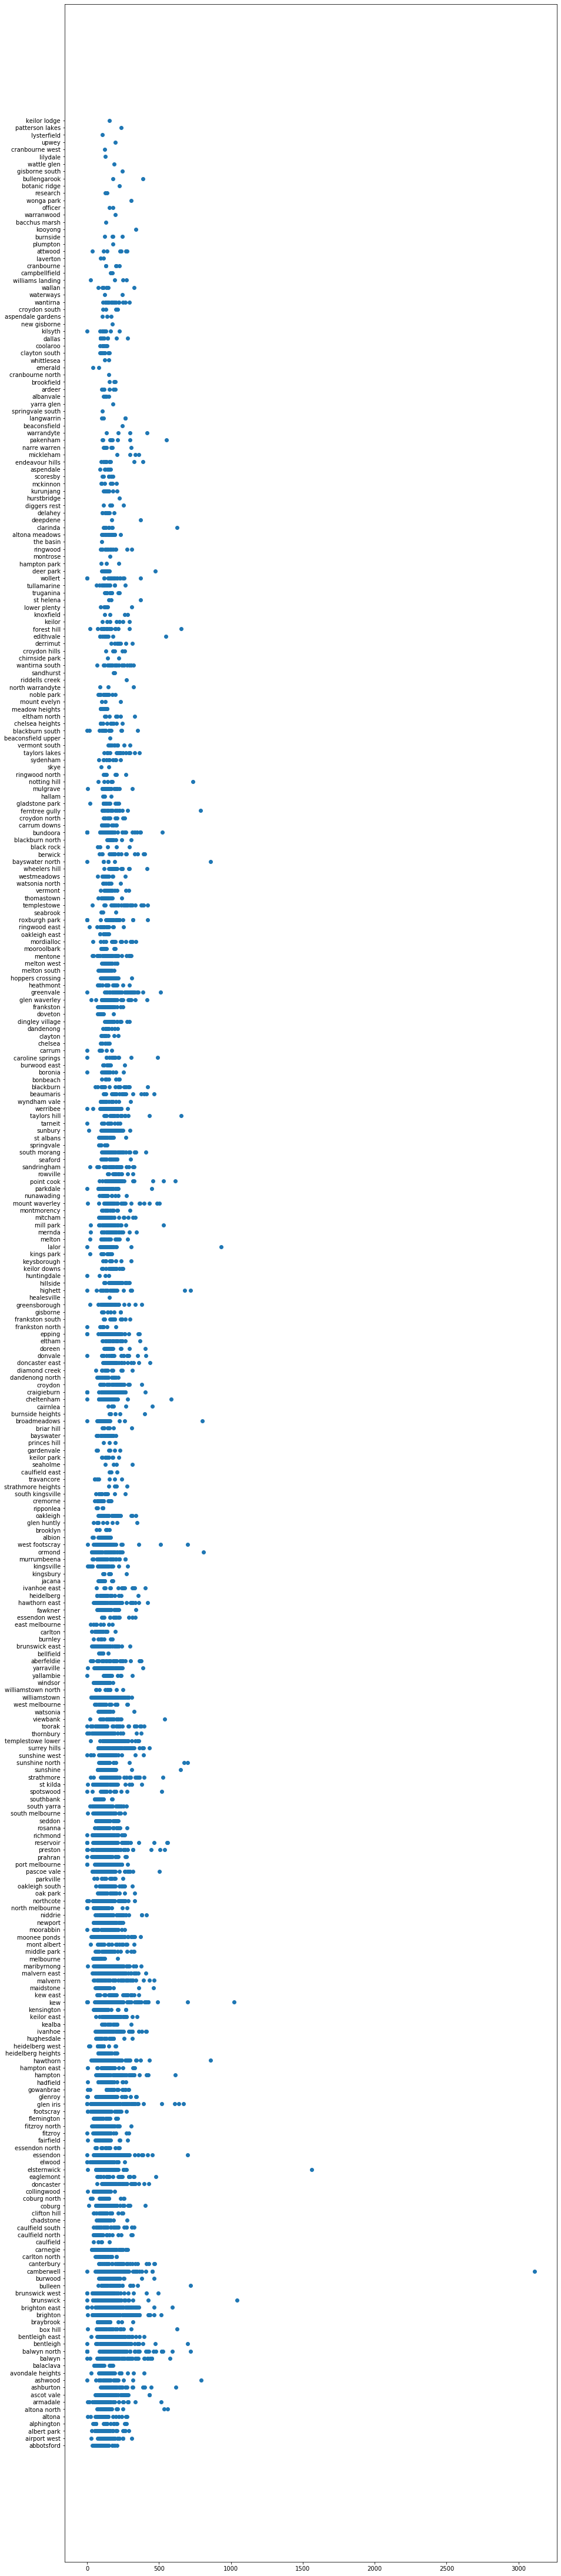

In [19]:
plt.rcParams['figure.figsize'] = [15, 80]
plt.scatter(dataset.dropna().BuildingArea,dataset.dropna().Suburb)
plt.show()

In [20]:
dataset.BuildingArea = dataset.groupby('Suburb').BuildingArea.transform(lambda x:x.fillna(x.median()))

/home/parth/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


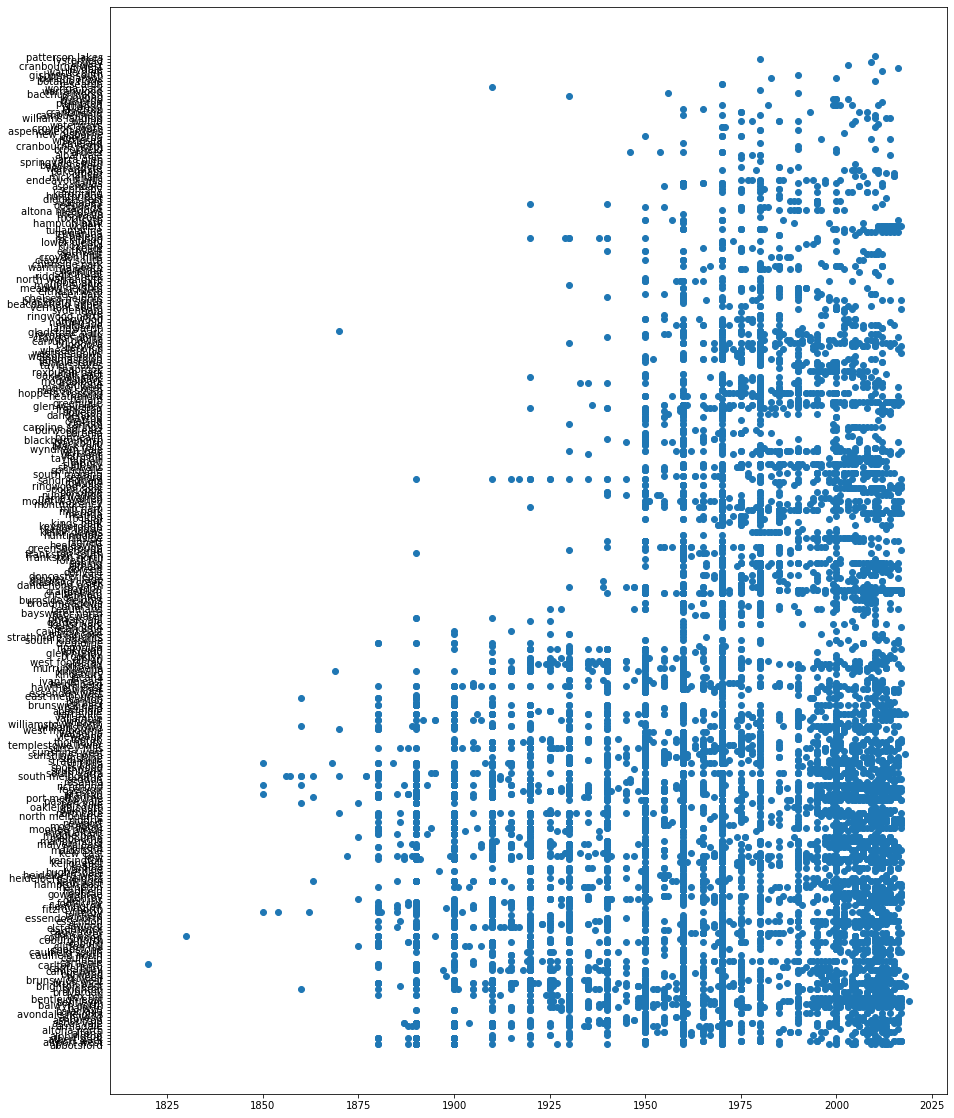

In [21]:
plt.rcParams['figure.figsize'] = [15, 20]
plt.scatter(dataset.dropna().YearBuilt,dataset.dropna().Suburb)
plt.show()

In [22]:
# After all this preprocessing we still find some building area and landsize having NA we will drop them
dataset = dataset.drop(dataset[dataset.BuildingArea.isnull()].index)
dataset = dataset.drop(dataset[dataset.Landsize.isnull()].index)

In [23]:
dataset.YearBuilt = dataset.groupby('Suburb').YearBuilt.transform(lambda x:x.fillna(x.median()))

In [24]:
# here the price is filled only for the process of filling it. In the model building
# section this is the target variable

dataset.Price = dataset.groupby(['Rooms','Suburb']).Price.transform(lambda x:x.fillna(x.mean()))

In [25]:
dataset = dataset.drop(dataset[dataset.Price.isnull()].index)

In [26]:
dataset.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
extract          0
dtype: int64

In [27]:
mmExtracted = dataset[dataset.extract == 1]
del mmExtracted['extract']
mmExtracted.to_csv('extracted_mean_median_mode.csv',index=False)

del dataset['extract']
dataset.to_csv('mmClean.csv',index=False)

In [28]:
del dataset
del mmExtracted

# Task 1.1.2.b Use Linear Interpolation to populate Missing Fields

In [29]:
import pandas as pd
dataset = pd.read_csv('../../Dataset/HousingDataset/Melbourne_housing_dataset_full.csv')

# the extract column is added only for task 1.1.2.c to get only imputed tuples in a separate CSV
dataset['extract'] = 0
dataset.loc[dataset.isnull().any(axis=1),'extract'] = 1

In [30]:
dataset = dataset.interpolate(limit_direction='both')

In [31]:
dataset.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    0
extract          0
dtype: int64

In [32]:
dataset = dataset.dropna()

In [33]:
liExtracted = dataset[dataset.extract == 1]
del liExtracted['extract']
liExtracted.to_csv('extracted_linear_interpolation.csv',index=False)

del dataset['extract']
dataset.to_csv('LiClean.csv',index=False)

In [34]:
del dataset
del liExtracted

# Task 1.2 Categorical Data Encoding

To perform this task, the dataset which is imputed and saved as mmClean is used

In [35]:
import pandas as pd
dataset = pd.read_csv('mmClean.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,abbotsford,68 studley st,2,h,9.410227e+05,ss,jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,98.0,1922.5,yarra city council,-37.8014,144.9958,northern metropolitan,4019.0
1,abbotsford,85 turner st,2,h,1.480000e+06,s,biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,98.0,1922.5,yarra city council,-37.7996,144.9984,northern metropolitan,4019.0
2,abbotsford,25 bloomburg st,2,h,1.035000e+06,s,biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,yarra city council,-37.8079,144.9934,northern metropolitan,4019.0
3,abbotsford,18/659 victoria st,3,u,1.241671e+06,vb,rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,98.0,1922.5,yarra city council,-37.8114,145.0116,northern metropolitan,4019.0
4,abbotsford,5 charles st,3,h,1.465000e+06,sp,biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,yarra city council,-37.8093,144.9944,northern metropolitan,4019.0


In [36]:
dataset.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [37]:
dataset.Regionname.unique()

array(['northern metropolitan', 'western metropolitan',
       'southern metropolitan', 'eastern metropolitan',
       'south-eastern metropolitan', 'eastern victoria',
       'northern victoria', 'western victoria'], dtype=object)

In [38]:
dataset.CouncilArea.unique()

array(['yarra city council', 'moonee valley city council',
       'port phillip city council', 'darebin city council',
       'hobsons bay city council', 'stonnington city council',
       'boroondara city council', 'monash city council',
       'glen eira city council', 'whitehorse city council',
       'maribyrnong city council', 'bayside city council',
       'moreland city council', 'manningham city council',
       'melbourne city council', 'banyule city council',
       'brimbank city council', 'kingston city council',
       'hume city council', 'knox city council', 'maroondah city council',
       'casey city council', 'melton city council',
       'greater dandenong city council', 'nillumbik shire council',
       'whittlesea city council', 'frankston city council',
       'macedon ranges shire council', 'yarra ranges shire council',
       'wyndham city council', 'cardinia shire council',
       'mitchell shire council', 'moorabool shire council'], dtype=object)

In [39]:
regionname = pd.get_dummies(dataset['Regionname'],prefix='category')

In [40]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
councilarea = labelEncoder.fit_transform(dataset['CouncilArea'])

In [41]:
councilarea = pd.DataFrame({'CouncilArea_Label':councilarea})

In [42]:
new_dataset = pd.concat([regionname,councilarea],axis = 1)

In [43]:
new_dataset.to_csv('encoded.csv',index=False)

In [44]:
del dataset
del new_dataset